In [1]:
# Step 1

import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Step 2

# Check for null values in each column
null_values = df.isnull().sum()

# Filter columns with null values
columns_with_nulls = null_values[null_values > 0]

# Display columns with null values
print(columns_with_nulls)


Age         177
Cabin       687
Embarked      2
dtype: int64


In [3]:
# Step 3

# Fill null values in 'Age' with the mean of the other values and 'Cabin' with 'Unknown'
df.fillna({'Age': df['Age'].mean(), 'Cabin': 'Unknown'}, inplace = True)

# Display the updated DataFrame to check the changes
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  Unknown        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  Unknown        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  Unk

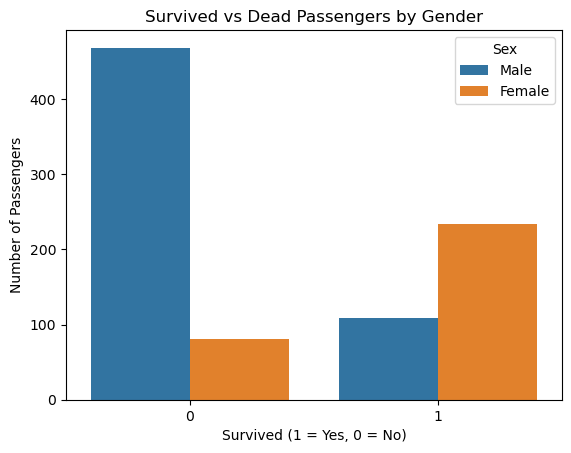

In [4]:
# Step 4

import seaborn as sns
import matplotlib.pyplot as plt

# Countplot to show the number of survivors and dead passengers by gender
sns.countplot(data=df, x='Survived', hue='Sex')

# Customize the plot
plt.title('Survived vs Dead Passengers by Gender')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.legend(title='Sex', loc='upper right', labels=['Male', 'Female'])

# Show the plot
plt.show()


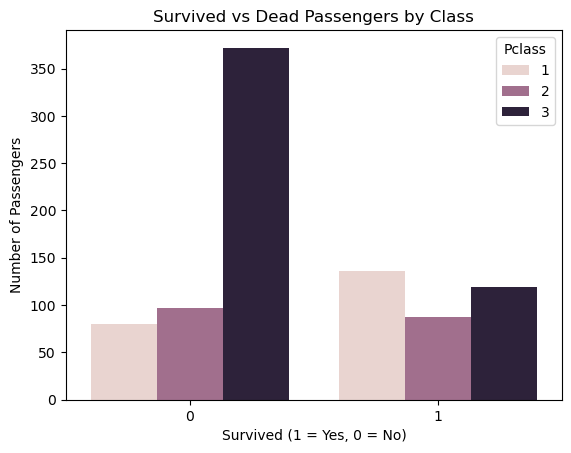

In [27]:
# Step 5

# Create the seaborn count plot
sns.countplot(data=df, x='Survived', hue='Pclass')

# Customize the seaborn plot
plt.title('Survived vs Dead Passengers by Class')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass')

# Show the seaborn plot
plt.show()

In [28]:
# Step 6

# Define a function to classify ages into classes
def classify_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

# Apply the function to create the 'AgeClass' column
df['AgeClass'] = df['Age'].apply(classify_age)

# Display the first few rows to check the changes
print(df[['Age', 'AgeClass']].head())


    Age  AgeClass
0  22.0         1
1  38.0         3
2  26.0         1
3  35.0         2
4  35.0         2


In [30]:
# Step 7

# Drop the 'Age' column
df.drop(columns=['Age'], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,Unknown,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,Unknown,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,1


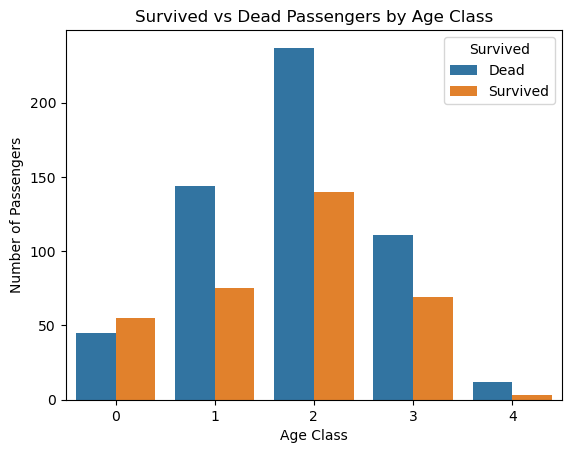

In [31]:
# Step 8

# Countplot using seaborn to show the number of survivors and dead passengers by age class
sns.countplot(data=df, x='AgeClass', hue='Survived')

# Customize the seaborn plot
plt.title('Survived vs Dead Passengers by Age Class')
plt.xlabel('Age Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Dead', 'Survived'])

# Show the plot
plt.show()

